# CO2 predection from vehicles emission

In [1]:
#Importing the libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [2]:
# pwd

In [3]:
# Import the data & read the data
# data = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Major project /MY2022 Fuel Consumption Ratings.csv')
data = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [5]:
data.head(5)


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [6]:
data.tail(5)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
945,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


In [7]:
data.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


# Checking Null Values

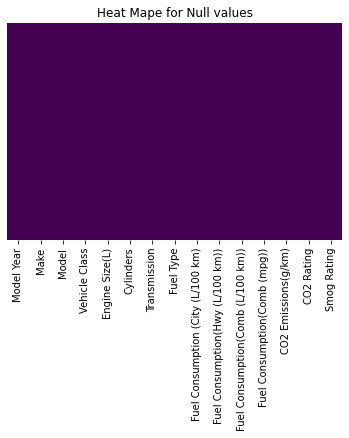

In [8]:
#Heat map to analysis the null values.
plt.title("Heat Mape for Null values")
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

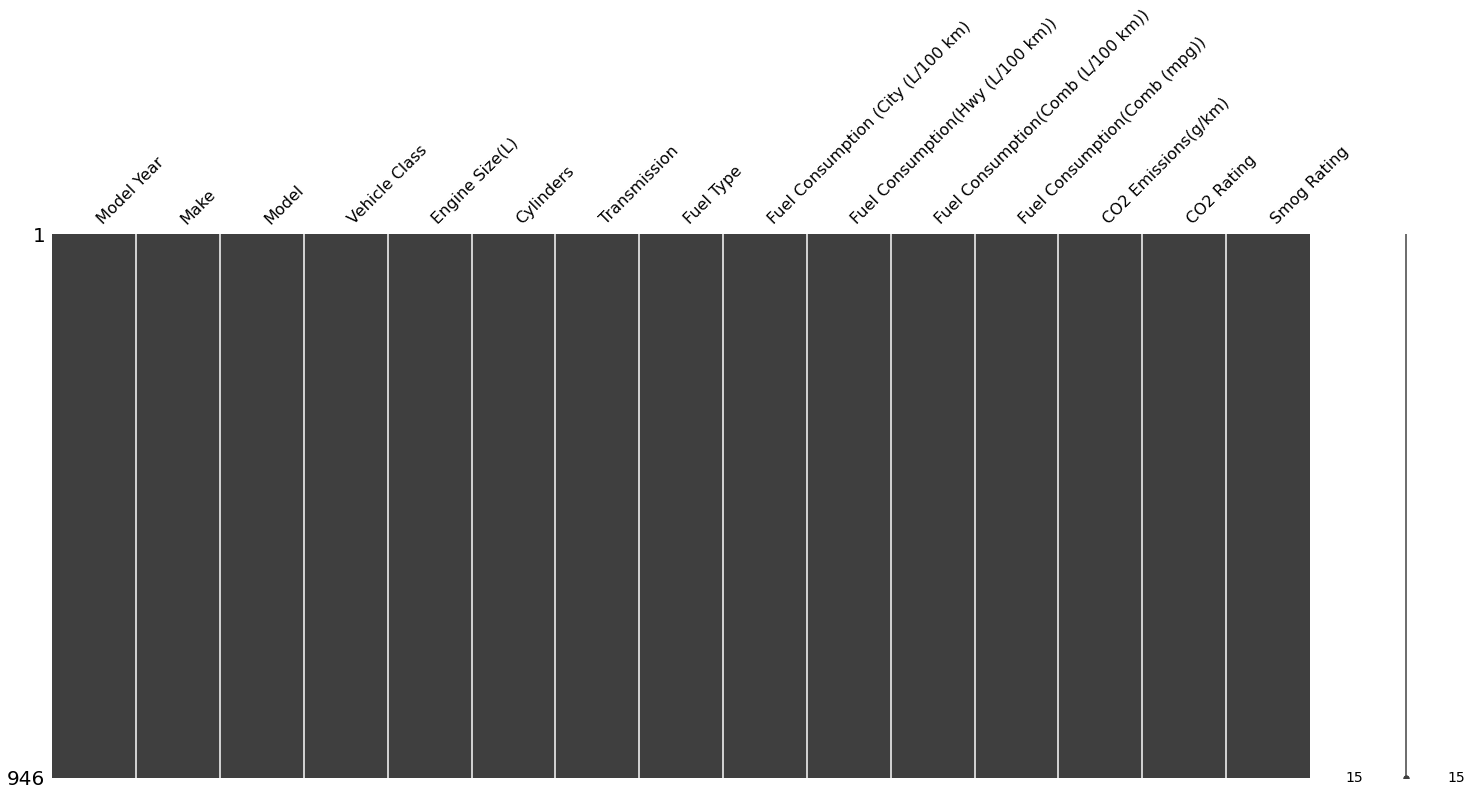

In [9]:
msno.matrix(data)

In [10]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

# correlaction of dataset.

In [11]:
corrMatrix = data.corr()

In [12]:
print(corrMatrix)

                                   Model Year  Engine Size(L)  Cylinders  \
Model Year                                NaN             NaN        NaN   
Engine Size(L)                            NaN        1.000000   0.920698   
Cylinders                                 NaN        0.920698   1.000000   
Fuel Consumption (City (L/100 km)         NaN        0.834925   0.845688   
Fuel Consumption(Hwy (L/100 km))          NaN        0.749374   0.737652   
Fuel Consumption(Comb (L/100 km))         NaN        0.818694   0.821718   
Fuel Consumption(Comb (mpg))              NaN       -0.704163  -0.693594   
CO2 Emissions(g/km)                       NaN        0.824188   0.833241   
CO2 Rating                                NaN       -0.766333  -0.762157   
Smog Rating                               NaN       -0.448239  -0.502149   

                                   Fuel Consumption (City (L/100 km)  \
Model Year                                                       NaN   
Engine Size(L)     

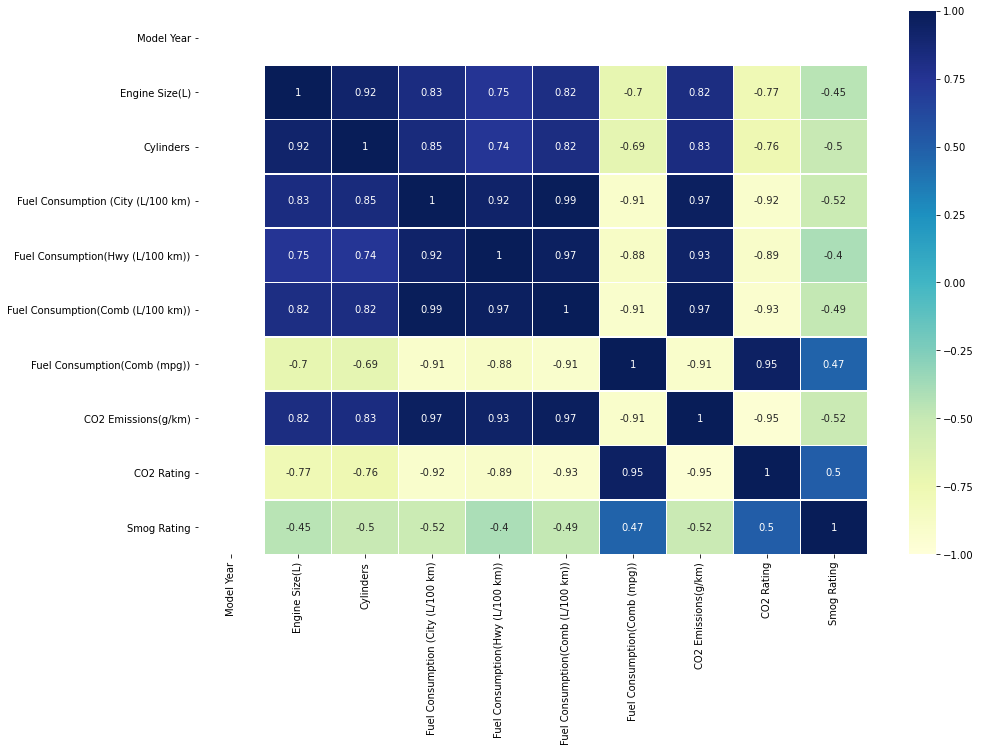

In [13]:
#Heatmap to study the correlaction of data
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, linewidth=.5, cmap="YlGnBu")

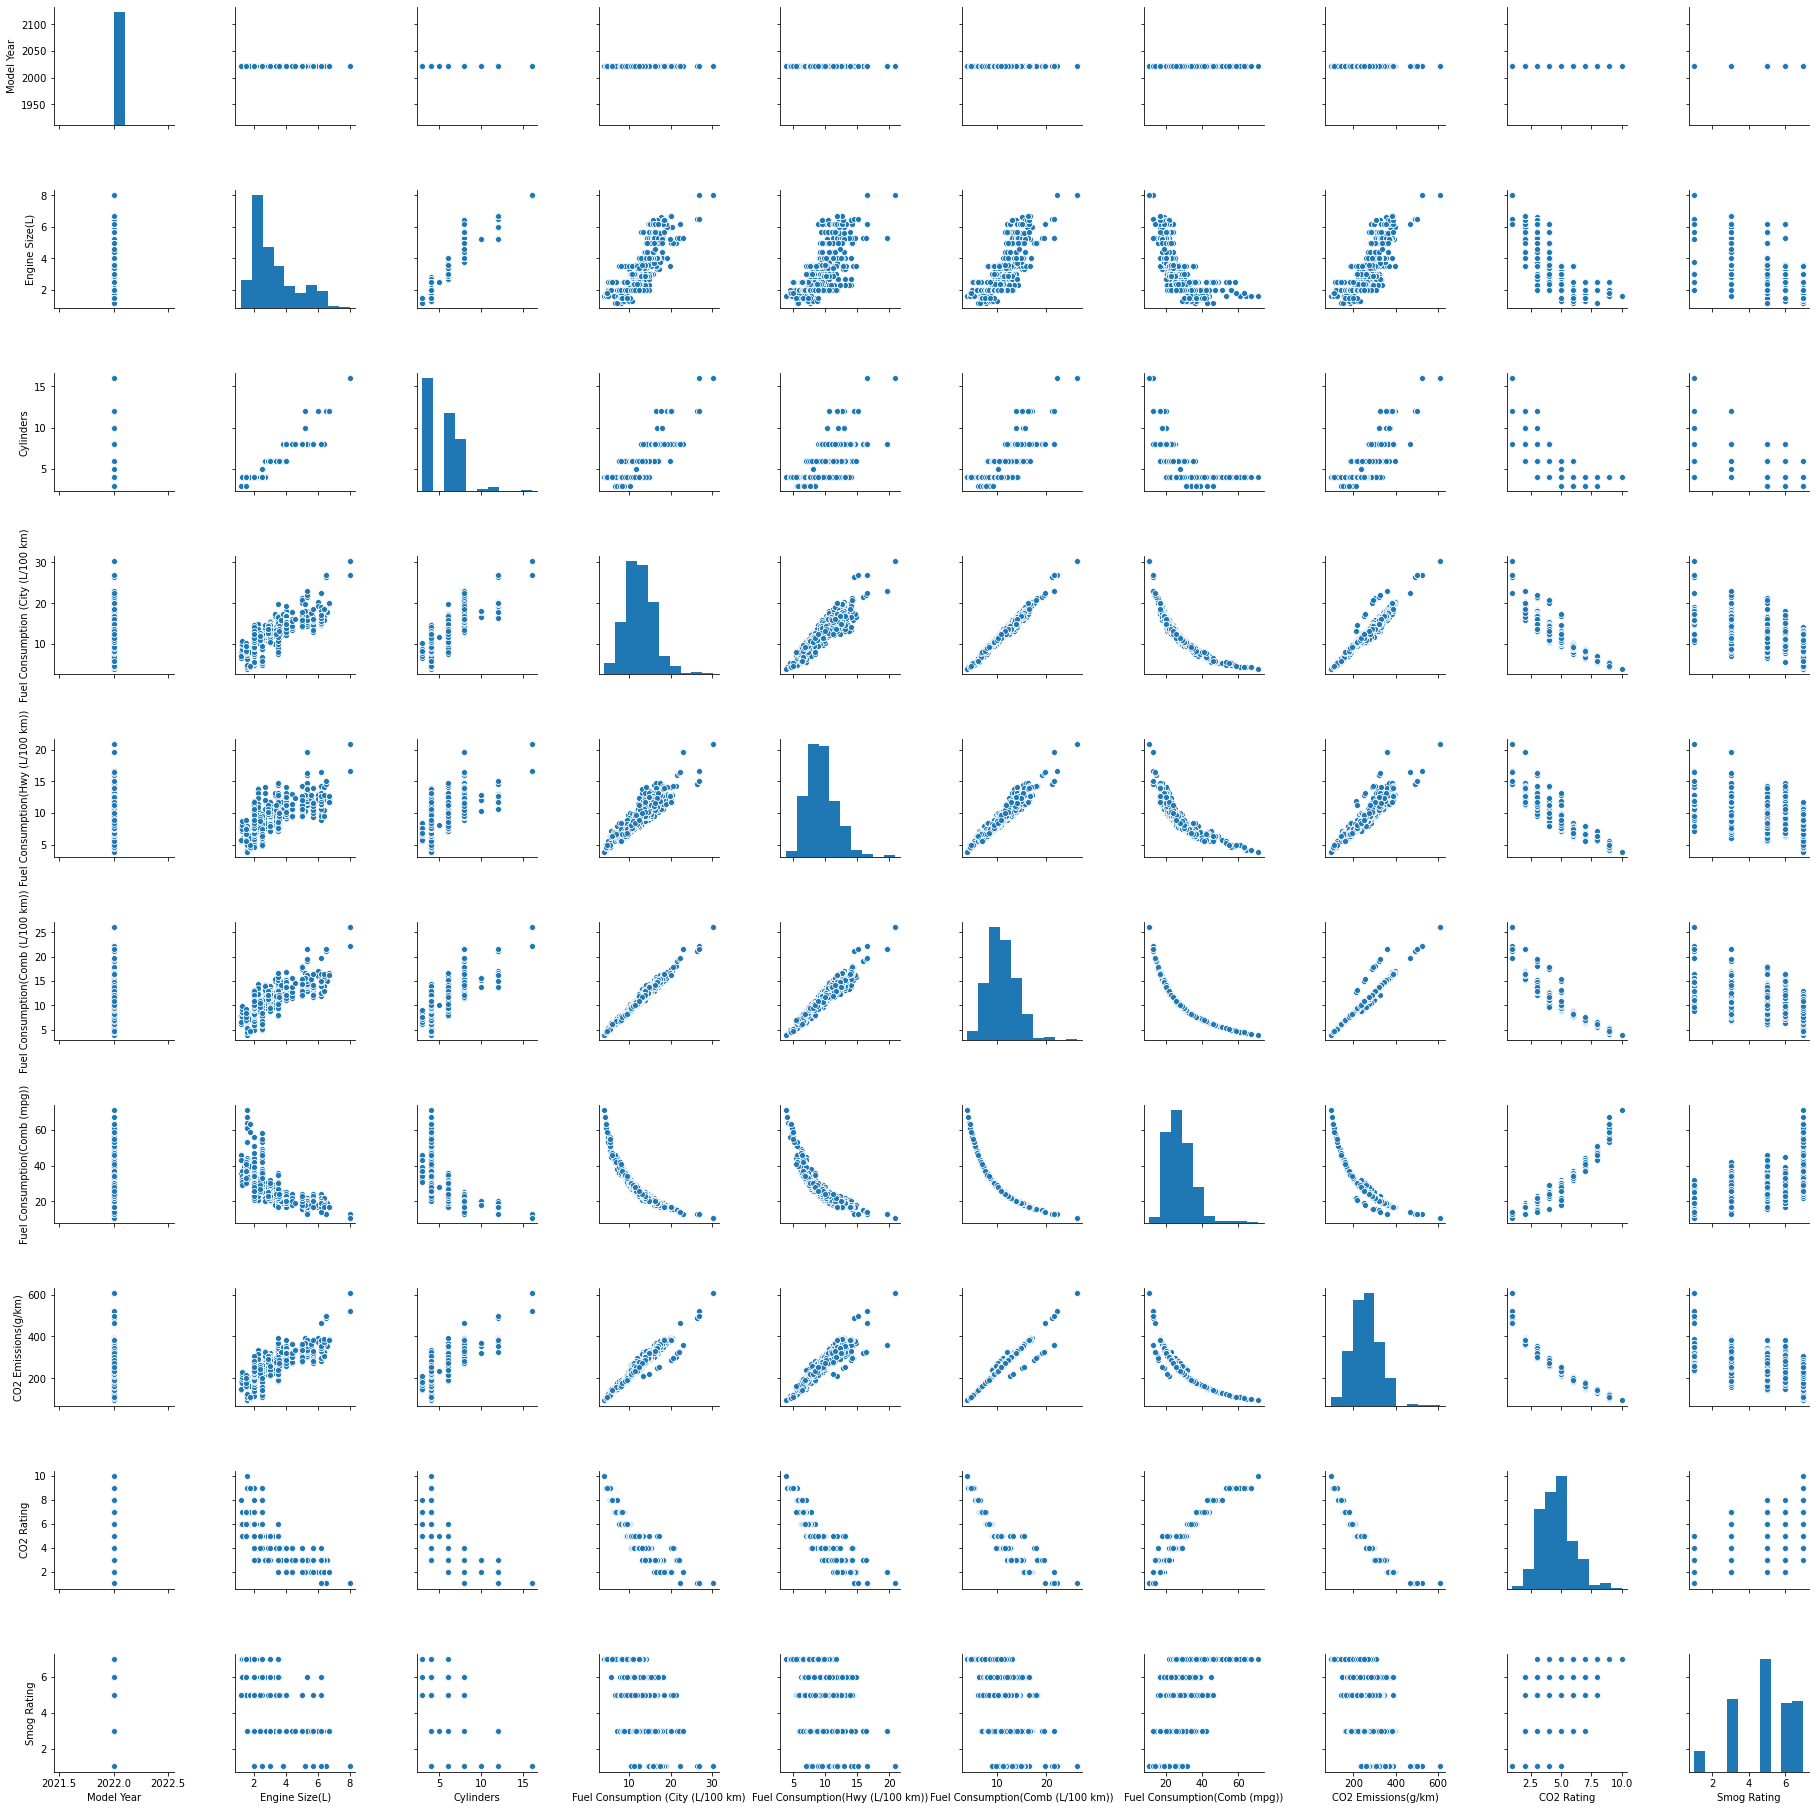

In [14]:
#Pair plot of dataset
sns.pairplot(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

# One-Hot Encoding

In [16]:
obj = data.select_dtypes('object')
obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           946 non-null    object
 1   Model          946 non-null    object
 2   Vehicle Class  946 non-null    object
 3   Transmission   946 non-null    object
 4   Fuel Type      946 non-null    object
dtypes: object(5)
memory usage: 37.1+ KB


In [17]:
columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [18]:
print(columns)

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']


In [19]:
len(columns)

5

In [20]:
#One-Hot Encodding.
df_final=data
i=0
for fields in columns:
    print(fields)
    df1=pd.get_dummies(data[fields],drop_first=True)

    data.drop([fields],axis=1,inplace=True)
    if i==0:
        df_final=df1.copy()
    else:

        df_final=pd.concat([df_final,df1],axis=1)
    i=i+1
df_final=pd.concat([data,df_final],axis=1)

Make
Model
Vehicle Class
Transmission
Fuel Type


In [21]:
df_final.shape

(946, 800)

In [22]:
df_final.head()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,...,AV10,AV6,AV7,AV8,M5,M6,M7,E,X,Z
0,2022,2.4,4,9.9,7.0,8.6,33,200,6,3,...,0,0,0,0,0,0,0,0,0,1
1,2022,3.5,6,12.6,9.4,11.2,25,263,4,5,...,0,0,0,0,0,0,0,0,0,1
2,2022,2.0,4,11.0,8.6,9.9,29,232,5,6,...,0,0,0,0,0,0,0,0,0,1
3,2022,2.0,4,11.3,9.1,10.3,27,242,5,6,...,0,0,0,0,0,0,0,0,0,1
4,2022,2.0,4,11.2,8.0,9.8,29,230,5,7,...,0,0,0,0,0,0,0,0,0,1


# Scalling and Normalization

In [23]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

# transform training data
df_final = pd.DataFrame(norm.fit_transform(df_final), columns= df_final.columns)



# Spliting Train and Test dataset

In [24]:
Y=df_final["CO2 Emissions(g/km)"]

In [25]:
Y.shape

(946,)

In [26]:
X = df_final.drop(['CO2 Emissions(g/km)'],axis=1)

In [27]:
X.shape

(946, 799)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(662, 799)
(662,)
(284, 799)
(284,)


# Models


# XGBOOST

In [30]:
#Using EXtreme Gradient Boosting(xgboost).
import xgboost
regressor=xgboost.XGBRegressor()

In [31]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [32]:
# Hyper Parameter Optimization for xgboost.

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [35]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [36]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
model1=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=0, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True,tree_method='exact', subsample=1)

In [38]:
model1.fit(X_train,y_train)

[14:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, nthread=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
xgboost_predection=model1.predict(X_test)

In [40]:
xgboost_predection

array([0.41443914, 0.2955435 , 0.44300628, 0.47506312, 0.24479061,
       0.34994054, 0.23978478, 0.44633484, 0.28811496, 0.44787621,
       0.42505708, 0.5603524 , 0.1616843 , 0.44707888, 0.30106384,
       0.44470996, 0.45609754, 0.48684028, 0.19915316, 0.3055976 ,
       0.19176015, 0.20371842, 0.4727038 , 0.4627118 , 0.14561695,
       0.28226358, 0.3726511 , 0.03238255, 0.2313729 , 0.34733814,
       0.14588156, 0.41361964, 0.34932402, 0.34799382, 0.25739384,
       0.33599004, 0.44240007, 0.17107075, 0.45727465, 0.23196918,
       0.29961067, 0.23444054, 0.2449165 , 0.3627774 , 0.5004184 ,
       0.3393008 , 0.32766652, 0.34122354, 0.2830027 , 0.20214069,
       0.5594918 , 0.34933797, 0.4598211 , 0.21821105, 0.47535455,
       0.2856022 , 0.44386107, 0.28590184, 0.18476146, 0.17949614,
       0.3756325 , 0.03098413, 0.49827483, 0.34782416, 0.3770422 ,
       0.23401302, 0.25305182, 0.24211773, 0.34495464, 0.2634712 ,
       0.44914532, 0.4366066 , 0.18453565, 0.1774989 , 0.36571

In [41]:
scorexgb = model1.score(X_test, y_test)
print(scorexgb)

0.9850118516715156


In [42]:
XGB_Mean_absolute_error = round(sm.mean_absolute_error(y_test, xgboost_predection), 2)
XGB_Mean_squared_error = round(sm.mean_squared_error(y_test, xgboost_predection), 2)
XGB_Median_absolute_error = round(sm.median_absolute_error(y_test, xgboost_predection), 2) 
XGB_Explain_variance_score = round(sm.explained_variance_score(y_test, xgboost_predection), 2) 
XGB_R2_score = round(sm.r2_score(y_test, xgboost_predection), 2)

In [43]:
print("Mean absolute error =", XGB_Mean_absolute_error)
print("Mean squared error =", XGB_Mean_squared_error)
print("Median absolute error =", XGB_Median_absolute_error)
print("Explain variance score =", XGB_Explain_variance_score)
print("R2 score =", XGB_R2_score)

Mean absolute error = 0.01
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.99
R2 score = 0.99


# Linear Regraction

In [44]:
from sklearn.linear_model import Lasso, Ridge,LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [45]:
linear_regression = make_pipeline(StandardScaler(), LinearRegression())

In [46]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [47]:
linear_regression_predection = linear_regression.predict(X_test)

In [48]:
linear_regression_predection.shape

(284,)

In [49]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, linear_regression_predection), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, linear_regression_predection), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, linear_regression_predection), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, linear_regression_predection), 2)) 
print("R2 score =", round(sm.r2_score(y_test, linear_regression_predection), 2))

Mean absolute error = 46150951080.33
Mean squared error = 5.229283619607407e+21
Median absolute error = 27336081230.54
Explain variance score = -3.762160777225612e+23
R2 score = -3.776500266458262e+23


In [50]:
LR_Mean_absolute_error = round(sm.mean_absolute_error(y_test, linear_regression_predection), 2)
LR_Mean_squared_error = round(sm.mean_squared_error(y_test, linear_regression_predection), 2)
LR_Median_absolute_error = round(sm.median_absolute_error(y_test, linear_regression_predection), 2) 
LR_Explain_variance_score = round(sm.explained_variance_score(y_test, linear_regression_predection), 2) 
LR_R2_score = round(sm.r2_score(y_test, linear_regression_predection), 3)

In [51]:
print("Mean absolute error =", LR_Mean_absolute_error)
print("Mean squared error =", LR_Mean_squared_error)
print("Median absolute error =", LR_Median_absolute_error)
print("Explain variance score =", LR_Explain_variance_score)
print("R2 score =", LR_R2_score)

Mean absolute error = 46150951080.33
Mean squared error = 5.229283619607407e+21
Median absolute error = 27336081230.54
Explain variance score = -3.762160777225612e+23
R2 score = -3.776500266458262e+23


In [52]:
score = linear_regression.score(X_test, y_test)
print(score)

-3.776500266458262e+23


# Decision Tree Classifier

In [53]:
from sklearn import tree

In [54]:
decision_tree = tree.DecisionTreeRegressor()

In [55]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
decision_tree_predection = decision_tree.predict(X_test)

In [57]:
decision_tree_predection

array([0.41245136, 0.30155642, 0.45136187, 0.4766537 , 0.24708171,
       0.35992218, 0.24513619, 0.44941634, 0.27821012, 0.44552529,
       0.41245136, 0.55642023, 0.1614786 , 0.44357977, 0.29571984,
       0.43774319, 0.45330739, 0.4922179 , 0.19649805, 0.30933852,
       0.19455253, 0.20428016, 0.4688716 , 0.46108949, 0.14980545,
       0.28210117, 0.37354086, 0.0311284 , 0.23151751, 0.34435798,
       0.1459144 , 0.41050584, 0.35992218, 0.35992218, 0.26070039,
       0.32684825, 0.44357977, 0.17509728, 0.46108949, 0.22762646,
       0.307393  , 0.22568093, 0.23929961, 0.37743191, 0.50583658,
       0.33268482, 0.31906615, 0.35992218, 0.28210117, 0.20622568,
       0.55642023, 0.35214008, 0.46303502, 0.22178988, 0.4766537 ,
       0.28793774, 0.44552529, 0.28210117, 0.17898833, 0.18093385,
       0.37354086, 0.01750973, 0.48832685, 0.35214008, 0.37548638,
       0.23151751, 0.24708171, 0.24708171, 0.34824903, 0.25680934,
       0.45330739, 0.44163424, 0.1848249 , 0.18093385, 0.35408

In [58]:
DT_Mean_absolute_error = round(sm.mean_absolute_error(y_test, decision_tree_predection), 2)
DT_Mean_squared_error = round(sm.mean_squared_error(y_test, decision_tree_predection), 2)
DT_Median_absolute_error = round(sm.median_absolute_error(y_test, decision_tree_predection), 2) 
DT_Explain_variance_score = round(sm.explained_variance_score(y_test, decision_tree_predection), 2) 
DT_R2_score = round(sm.r2_score(y_test, decision_tree_predection), 2)

In [59]:
print("Mean absolute error =", DT_Mean_absolute_error)
print("Mean squared error =", DT_Mean_squared_error)
print("Median absolute error =", DT_Median_absolute_error)
print("Explain variance score =", DT_Explain_variance_score)
print("R2 score =", DT_R2_score)

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


In [60]:
scoredt = decision_tree.score(X_test, y_test)
print (scoredt)

0.9957418803294362


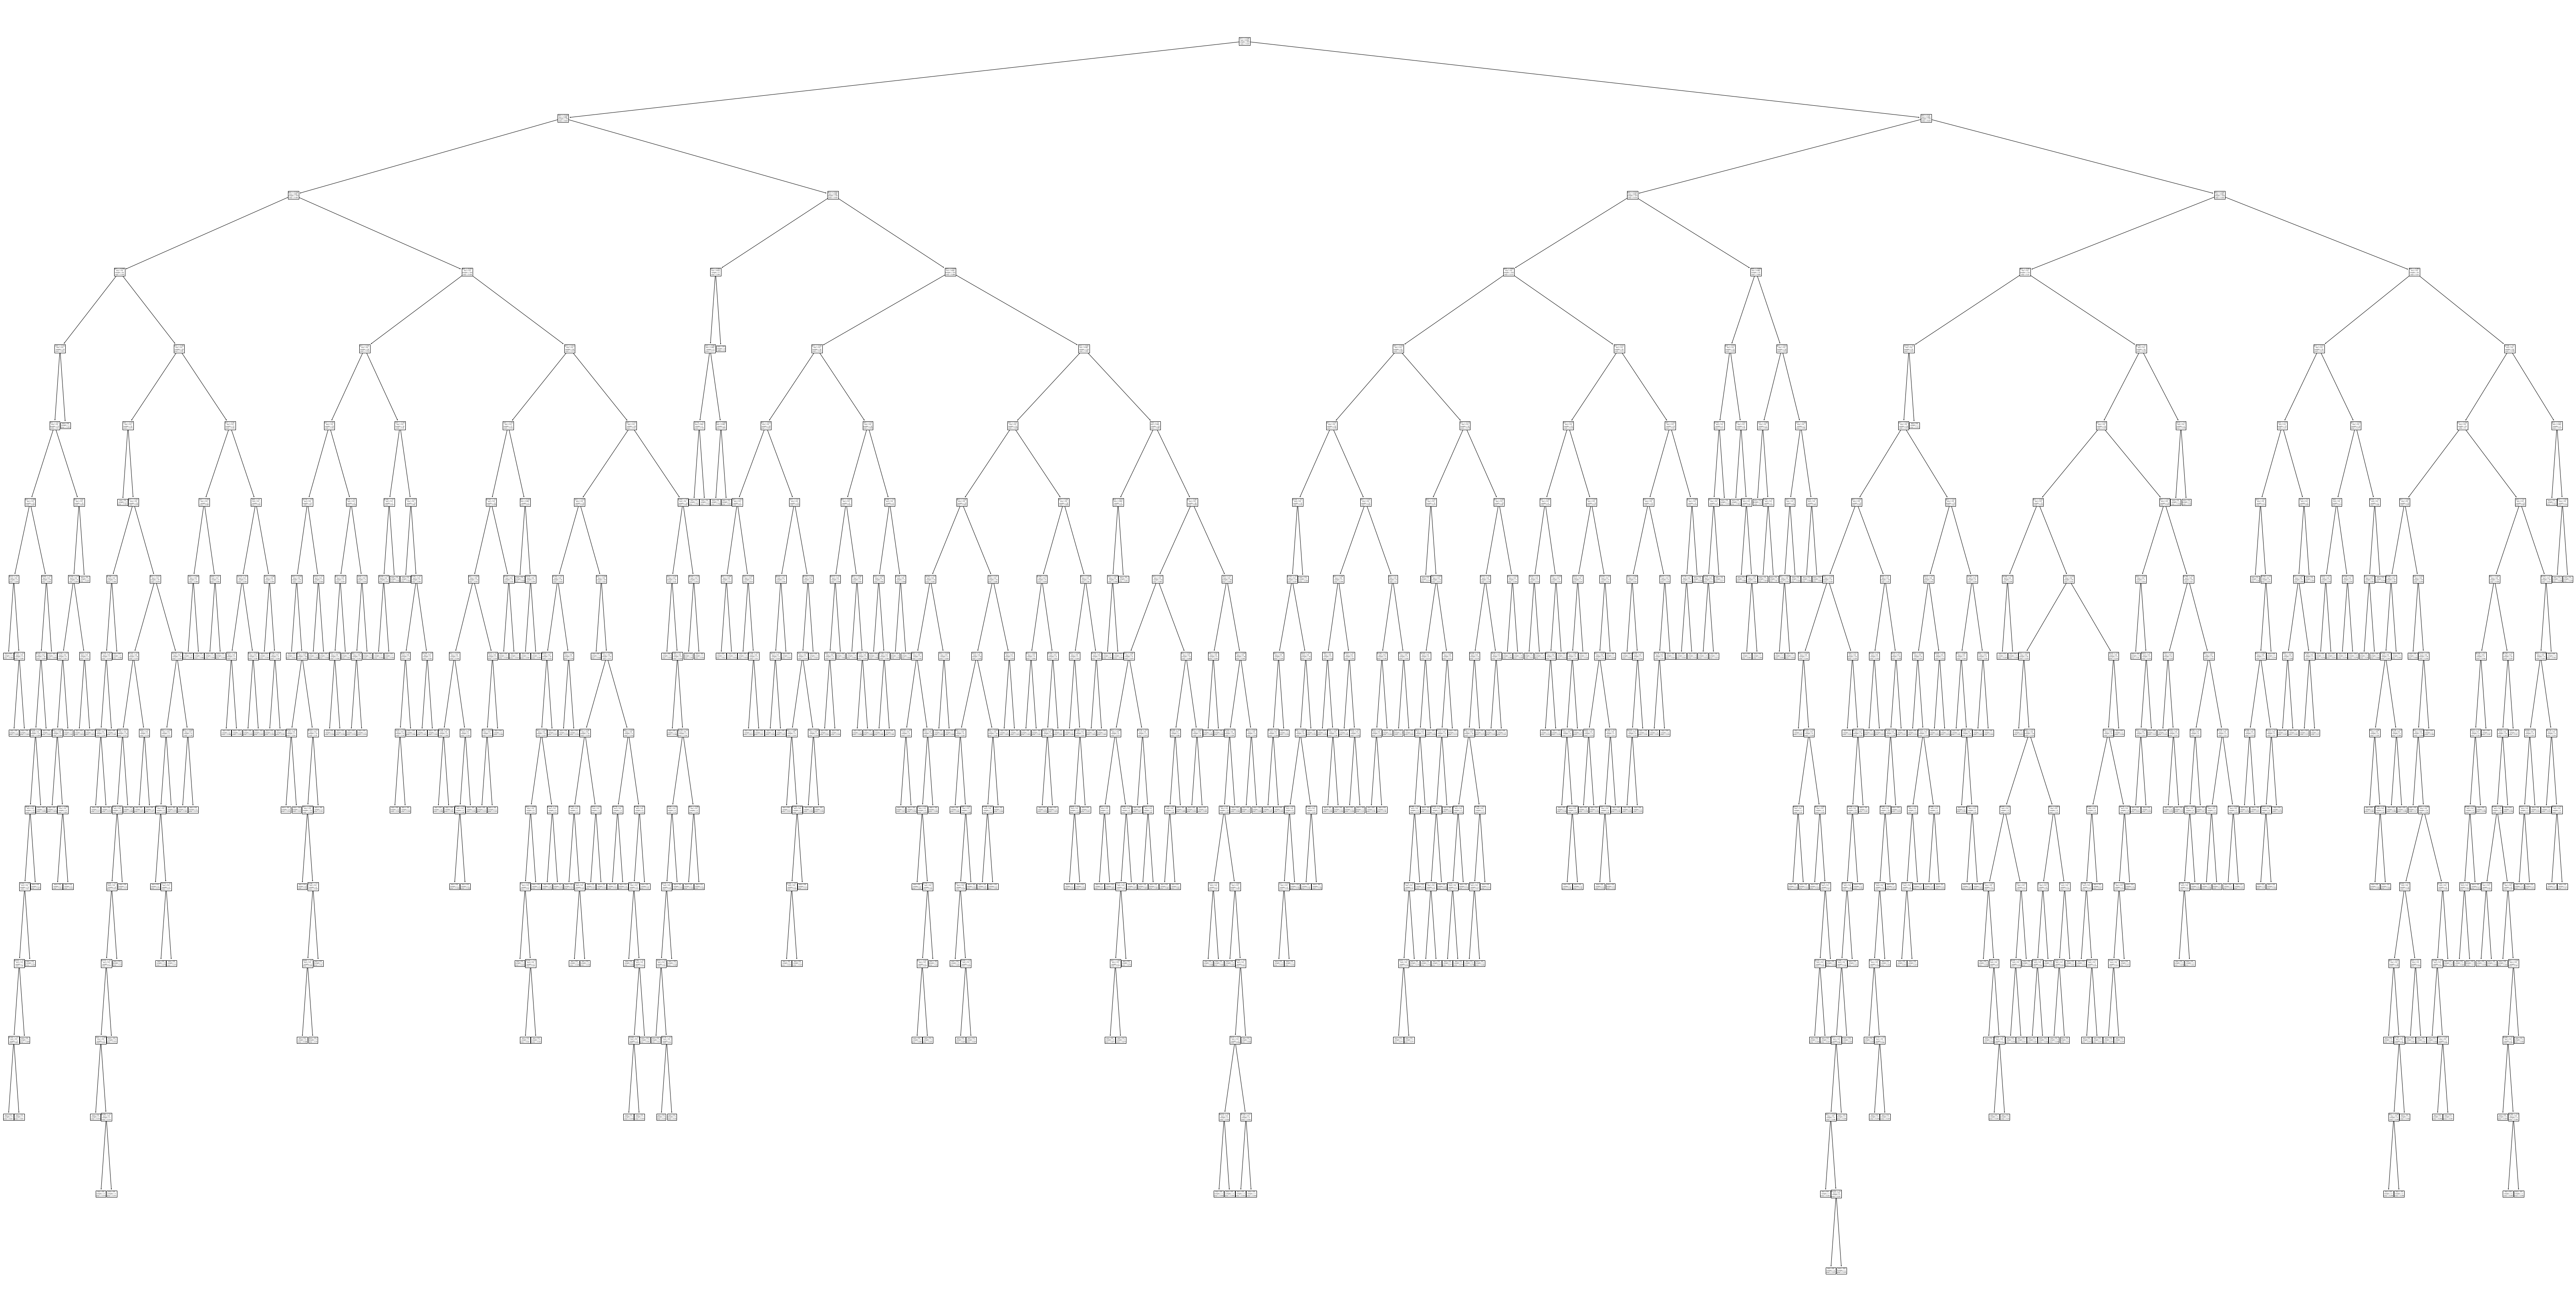

In [61]:
plt.figure(figsize=(115,60))
tree.plot_tree(decision_tree)
plt.show()

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
random_forest = RandomForestRegressor(max_depth=2, random_state=45)

In [64]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=45)

In [65]:
random_forest_predection = random_forest.predict(X_test)

In [66]:
random_forest_predection

array([0.37450612, 0.26381134, 0.46201281, 0.49128245, 0.26254785,
       0.37159673, 0.26254785, 0.47713768, 0.26381134, 0.47713768,
       0.37578758, 0.49128245, 0.15419985, 0.47713768, 0.26381134,
       0.47713768, 0.4816382 , 0.49128245, 0.15890876, 0.26381134,
       0.15419985, 0.17712431, 0.49128245, 0.4832091 , 0.15419985,
       0.26381134, 0.37450612, 0.15419985, 0.26129926, 0.37159673,
       0.15419985, 0.37450612, 0.37159673, 0.37159673, 0.26256274,
       0.37159673, 0.47713768, 0.15419985, 0.4832091 , 0.26254785,
       0.26381134, 0.26129926, 0.26254785, 0.37450612, 0.49128245,
       0.37159673, 0.37159673, 0.37159673, 0.26381134, 0.19925799,
       0.49128245, 0.37159673, 0.4832091 , 0.26129926, 0.49128245,
       0.26381134, 0.47713768, 0.26381134, 0.15419985, 0.15419985,
       0.37450612, 0.15419985, 0.49128245, 0.37159673, 0.37450612,
       0.26129926, 0.26381134, 0.26129926, 0.37159673, 0.26381134,
       0.47713768, 0.47713768, 0.15419985, 0.15419985, 0.37306

In [67]:
RF_Mean_absolute_error = round(sm.mean_absolute_error(y_test, random_forest_predection), 2)
RF_Mean_squared_error = round(sm.mean_squared_error(y_test, random_forest_predection), 2)
RF_Median_absolute_error = round(sm.median_absolute_error(y_test, random_forest_predection), 2) 
RF_Explain_variance_score = round(sm.explained_variance_score(y_test, random_forest_predection), 2) 
RF_R2_score = round(sm.r2_score(y_test, random_forest_predection), 2)

In [68]:
print("Mean absolute error =", RF_Mean_absolute_error)
print("Mean squared error =", RF_Mean_squared_error)
print("Median absolute error =", RF_Median_absolute_error)
print("Explain variance score =", RF_Explain_variance_score)
print("R2 score =", RF_R2_score)

Mean absolute error = 0.03
Mean squared error = 0.0
Median absolute error = 0.02
Explain variance score = 0.9
R2 score = 0.9


In [69]:
scorerf = random_forest.score(X_test, y_test)
print(scorerf)

0.9005656864073031


# KNearest Neighbors (KNN)

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
nearest_neighbor = KNeighborsRegressor(n_neighbors=5)

In [72]:
nearest_neighbor.fit(X_train, y_train)

KNeighborsRegressor()

In [73]:
nearest_neighbor_prediction = nearest_neighbor.predict(X_test)

In [74]:
nearest_neighbor_prediction

array([0.43579767, 0.28715953, 0.43579767, 0.47081712, 0.34747082,
       0.34163424, 0.22762646, 0.39416342, 0.31050584, 0.41828794,
       0.42412451, 0.46070039, 0.1692607 , 0.50817121, 0.26653696,
       0.43385214, 0.44785992, 0.47821012, 0.20311284, 0.34319066,
       0.19922179, 0.28171206, 0.46264591, 0.4155642 , 0.1307393 ,
       0.27898833, 0.35719844, 0.06653696, 0.22217899, 0.4151751 ,
       0.15797665, 0.45058366, 0.32879377, 0.30544747, 0.38754864,
       0.29649805, 0.41011673, 0.19027237, 0.39961089, 0.18988327,
       0.33385214, 0.22217899, 0.26848249, 0.31789883, 0.46264591,
       0.2844358 , 0.32140078, 0.31089494, 0.25680934, 0.22996109,
       0.49416342, 0.35175097, 0.47626459, 0.20856031, 0.44980545,
       0.31167315, 0.38988327, 0.27898833, 0.22957198, 0.20311284,
       0.39610895, 0.08171206, 0.34163424, 0.33268482, 0.35175097,
       0.25914397, 0.2463035 , 0.25914397, 0.3766537 , 0.29961089,
       0.39844358, 0.43229572, 0.27081712, 0.22568093, 0.34591

In [75]:
scoreknn = nearest_neighbor.score(X_test, y_test)
print(scoreknn)

0.8574282203836399


In [76]:
KNN_Mean_absolute_error = round(sm.mean_absolute_error(y_test, nearest_neighbor_prediction), 2)
KNN_Mean_squared_error = round(sm.mean_squared_error(y_test, nearest_neighbor_prediction), 2)
KNN_Median_absolute_error = round(sm.median_absolute_error(y_test, nearest_neighbor_prediction), 2) 
KNN_Explain_variance_score = round(sm.explained_variance_score(y_test, nearest_neighbor_prediction), 2) 
KNN_R2_score = round(sm.r2_score(y_test, nearest_neighbor_prediction), 2)

In [77]:
print("Mean absolute error =", KNN_Mean_absolute_error)
print("Mean squared error =", KNN_Mean_squared_error)
print("Median absolute error =", KNN_Median_absolute_error)
print("Explain variance score =", KNN_Explain_variance_score)
print("R2 score =", KNN_R2_score)

Mean absolute error = 0.03
Mean squared error = 0.0
Median absolute error = 0.03
Explain variance score = 0.86
R2 score = 0.86


# Support Vector Regression

In [90]:
from sklearn.svm import SVR

In [97]:
svr_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [98]:
svr_regr_prediction = svr_regr.predict(X_test)

In [99]:
svr_regr_prediction

array([0.3693208 , 0.30811666, 0.35070892, 0.35296807, 0.29815545,
       0.36159022, 0.30273925, 0.35871667, 0.35276989, 0.34961904,
       0.33459856, 0.3916501 , 0.34569626, 0.39723166, 0.35438907,
       0.37548031, 0.36276366, 0.36889814, 0.26675111, 0.31457388,
       0.2639401 , 0.27508206, 0.36917957, 0.37882502, 0.28810058,
       0.35633759, 0.37070703, 0.20301114, 0.30546549, 0.33787567,
       0.25090304, 0.3559242 , 0.36070769, 0.32941664, 0.29541813,
       0.34804837, 0.35575896, 0.34637532, 0.3732944 , 0.35291237,
       0.34386153, 0.30919361, 0.29966321, 0.32879935, 0.36384984,
       0.32239408, 0.31416985, 0.36097768, 0.35180844, 0.2958461 ,
       0.37833349, 0.32645042, 0.34920542, 0.28955173, 0.36402952,
       0.3533501 , 0.3354627 , 0.3557331 , 0.27873935, 0.26246004,
       0.34908315, 0.20816066, 0.37786895, 0.31744149, 0.32940197,
       0.352574  , 0.32209155, 0.29598475, 0.32608685, 0.35804566,
       0.35864089, 0.35230193, 0.30226268, 0.34695247, 0.36055

In [100]:
scoresvr = svr_regr.score(X_test, y_test)
print(scoresvr)

0.3779869026120337


In [101]:
SVR_Mean_absolute_error = round(sm.mean_absolute_error(y_test, svr_regr_prediction), 2)
SVR_Mean_squared_error = round(sm.mean_squared_error(y_test, svr_regr_prediction), 2)
SVR_Median_absolute_error = round(sm.median_absolute_error(y_test, svr_regr_prediction), 2) 
SVR_Explain_variance_score = round(sm.explained_variance_score(y_test, svr_regr_prediction), 2) 
SVR_R2_score = round(sm.r2_score(y_test, svr_regr_prediction), 2)

In [102]:
print("Mean absolute error =", SVR_Mean_absolute_error)
print("Mean squared error =", SVR_Mean_squared_error)
print("Median absolute error =", SVR_Median_absolute_error)
print("Explain variance score =", SVR_Explain_variance_score)
print("R2 score =", SVR_R2_score)

Mean absolute error = 0.07
Mean squared error = 0.01
Median absolute error = 0.06
Explain variance score = 0.39
R2 score = 0.38


# Modal Comparesion

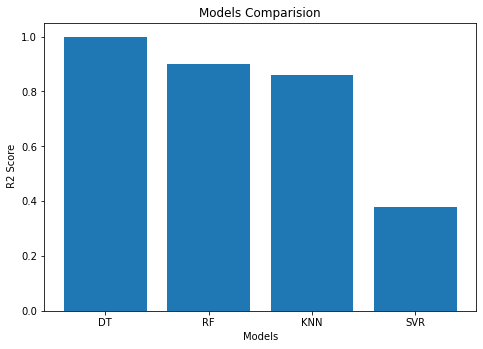

In [103]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['DT', 'RF', 'KNN', 'SVR']
scores = [DT_R2_score, RF_R2_score, KNN_R2_score, SVR_R2_score]
ax.bar(models,scores)
ax.set_ylabel(' R2 Score')
ax.set_xlabel('Models')
ax.set_title('Models Comparision')
plt.show()